In [26]:
# You must install this system library to make pylibdmtx work
# sudo apt-get install libdmtx0b

In [1]:
from PIL import Image
import pylibdmtx.pylibdmtx
import albumentations
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from skimage import transform
import json
import cv2
import datasets

/home/pk/miniconda3/envs/dp-dm-conda/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


# Thesis example

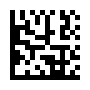

25NX16CEE0


In [6]:
# thesis example
import pylibdmtx.pylibdmtx
from PIL import Image

data_for_encoding = "25NX16CEE0".encode('utf8')
encoded = pylibdmtx.pylibdmtx.encode(data_for_encoding)
dm_code_image = Image.frombytes(
    mode='RGB',
    size=(encoded.width, encoded.height),
    data=encoded.pixels
)
display(dm_code_image)
decoded = pylibdmtx.pylibdmtx.decode(dm_code_image)
print(decoded[0].data.decode("utf8"))

In [7]:
img = dm_code_image

motion blur


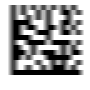

median blur


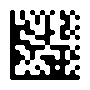

defocus


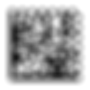

downscale


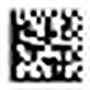

In [8]:
# Apply motion blur to the input image using a random-sized kernel.
print("motion blur")
display(Image.fromarray(albumentations.MotionBlur(always_apply=True, blur_limit=(7, 11))(image=np.array(img))["image"]))
# Blur the input image using a median filter with a random aperture linear size.
print("median blur")
display(Image.fromarray(albumentations.MedianBlur(always_apply=True, blur_limit=3)(image=np.array(img))["image"]))
# Apply defocus transform.
print("defocus")
display(Image.fromarray(albumentations.Defocus(always_apply=True, radius=(3,7))(image=np.array(img))["image"]))
# Decreases image quality by downscaling and upscaling back.
print("downscale")
display(Image.fromarray(albumentations.Downscale(always_apply=True, interpolation=cv2.INTER_LANCZOS4)(image=np.array(img))["image"]))

inverted


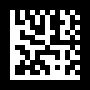

rotate


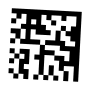

ISO noise


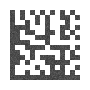

brightness and contrast


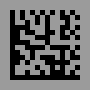

sun flare


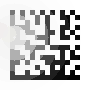

fog


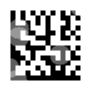

rain


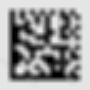

affine transformation


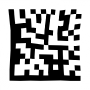

In [12]:
# invert image
print("inverted")
display(Image.fromarray(albumentations.InvertImg(always_apply=True)(image=np.array(img))["image"]))
print("rotate")
im_rot = Image.fromarray(albumentations.RandomRotate90(always_apply=True)(image=np.array(img))["image"])
display(Image.fromarray(albumentations.Rotate(always_apply=True, limit=[-3, -3], border_mode=cv2.BORDER_CONSTANT, value = [255, 255, 255])(image=np.array(im_rot))["image"]))
# ISO noise
print("ISO noise")
display(Image.fromarray(albumentations.ISONoise(always_apply=True, intensity=(0.5, 0.9))(image=np.array(img))["image"]))
print("brightness and contrast")
display(Image.fromarray(albumentations.RandomBrightnessContrast(always_apply=True, brightness_limit=0, contrast_limit=0.5)(image=np.array(img))["image"]))
# Simulates Sun Flare for the image
print("sun flare")
display(Image.fromarray(albumentations.RandomSunFlare(always_apply=True, src_radius=100, num_flare_circles_lower=3, src_color=((240, 240, 240)))(image=np.array(img))["image"]))
# random fog
print("fog")
display(Image.fromarray(albumentations.RandomFog(always_apply=True, fog_coef_lower=0.6, alpha_coef=0.5)(image=np.array(img))["image"]))
# random rain
print("rain")
display(Image.fromarray(albumentations.RandomRain(always_apply=True, rain_type="drizzle", brightness_coefficient=0.9)(image=np.array(img))["image"]))
# affine transformations
print("affine transformation")
display(Image.fromarray(albumentations.PiecewiseAffine(always_apply=True, scale=(0.01, 0.03))(image=np.array(img))["image"]))

brightness and contrast


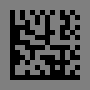

rain


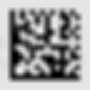

In [34]:
print("brightness and contrast")
display(Image.fromarray(albumentations.RandomBrightnessContrast(always_apply=True, brightness_limit=0, contrast_limit=0.5)(image=np.array(img))["image"]))
# random rain
print("rain")
display(Image.fromarray(albumentations.RandomRain(always_apply=True, rain_type="drizzle", brightness_coefficient=0.9)(image=np.array(img))["image"]))

In [36]:
import random
def change_code_color(img):
        if not albumentations.is_rgb_image(img):
            raise TypeError("ChangeBackgroundColor transformation expects 3-channel images.")
        
        synth_img = np.array(img)
        red, green, blue = synth_img.T
        white_areas = (red == 255) & (blue == 255) & (green == 255)
        black_areas = (red == 0) & (blue == 0) & (green == 0)
        random_num = random.random()
        if random_num <= 0.50:
            random_color = random.sample(range(180, 240), 3) # light color
            if random_num <= 0.4:
                 # make the color more yellow
                random_color[1] -= 20
                random_color[2] -= 50
            elif random_num <= 0.45:
                # make the color more blue
                random_color[0] -= 60
                random_color[1] -= 30
            synth_img[white_areas.T] = random_color
        elif random_num <= 0.7:
            random_color = [random.randrange(170, 250)] * 3 # light grey
            synth_img[white_areas.T] = random_color
        elif random_num <= 0.8: 
            random_color = random.sample(range(0, 35), 3) # dark color
            synth_img[black_areas.T] = random_color
        return synth_img

change color


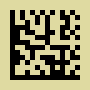

In [43]:
# change color
print("change color")
Image.fromarray(change_code_color(np.array(img)))

# First exploration

In [ ]:
encoded = pylibdmtx.pylibdmtx.encode('Some new example. Second example.'.encode('utf8'))
img = Image.frombytes('RGB', (encoded.width, encoded.height), encoded.pixels)
img.save('../pictures/dmtx.png')
decoded = pylibdmtx.pylibdmtx.decode(Image.open('../pictures/dmtx.png'))
decoded[0].data.decode("utf8")

'Some new example. Second example.'

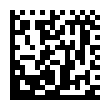

k25oNX163deEPn08


In [19]:
# thesis example
import pylibdmtx.pylibdmtx
from PIL import Image

data_for_encoding = "k25oNX163deEPn08".encode('utf8')
encoded = pylibdmtx.pylibdmtx.encode(data_for_encoding)
dm_code_image = Image.frombytes(
    mode='RGB',
    size=(encoded.width, encoded.height),
    data=encoded.pixels
)
display(dm_code_image)
decoded = pylibdmtx.pylibdmtx.decode(dm_code_image)
print(decoded[0].data.decode("utf8"))

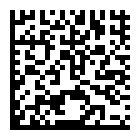

In [447]:
img

In [448]:
im_array = np.array(img)
for i in range(9):
    im_array[50][i] = [0, 0, 0]

In [449]:
pylibdmtx.pylibdmtx.decode(np.array(img))

[Decoded(data=b'Some new example. Second example.', rect=Rect(left=9, top=10, width=120, height=119))]

In [450]:
import torch
i = np.resize(np.array(img), (3, 1, 140, 140))
t  = torch.from_numpy(i)
t.shape

torch.Size([3, 1, 140, 140])

In [451]:
i = np.array(img).reshape(3, 1, 140, 140)
t  = torch.from_numpy(i)
t.shape

torch.Size([3, 1, 140, 140])

In [ ]:
import dm_codes.utils
n = dm_codes.utils.tensor_to_numpy_for_image(t)
n.shape

(3, 140, 140, 1)

In [453]:
n[0].shape

(140, 140, 1)

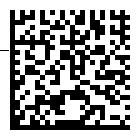

In [454]:
img2 = Image.fromarray(im_array)
img2

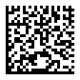

In [455]:
img_res = img.resize(size=(80,80))
img_res

In [456]:
pylibdmtx.pylibdmtx.decode(img_res)

[Decoded(data=b'Some new example. Second example.', rect=Rect(left=5, top=5, width=69, height=69))]

In [457]:
np.sum(np.asarray(img) == np.asarray(img2))

58773

In [458]:
pylibdmtx.pylibdmtx.decode(img2)

[Decoded(data=b'Some new example. Second example.', rect=Rect(left=8, top=10, width=121, height=119))]

In [459]:
pylibdmtx.pylibdmtx.decode(img)

[Decoded(data=b'Some new example. Second example.', rect=Rect(left=9, top=10, width=120, height=119))]

In [460]:
pylibdmtx.pylibdmtx.decode(img)[0].data.decode("utf8")

'Some new example. Second example.'

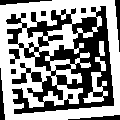

In [462]:
encoded = pylibdmtx.pylibdmtx.encode('Some rotated example.'.encode('utf8'))
img_rotated = Image.frombytes('RGB', (encoded.width, encoded.height), encoded.pixels)
img_rotated = img_rotated.rotate(95)
img_rotated

In [463]:
decoded_rotated = pylibdmtx.pylibdmtx.decode(img_rotated)
decoded_rotated

[Decoded(data=b'Some rotated example.', rect=Rect(left=113, top=14, width=-106, height=91))]

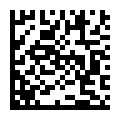

In [464]:
encoded = pylibdmtx.pylibdmtx.encode('Some colorful example.'.encode('utf8'))
img_colorful = Image.frombytes('RGB', (encoded.width, encoded.height), encoded.pixels)
img_colorful

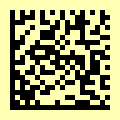

In [465]:
np_img_colorful = np.array(img_colorful)
red, green, blue = np_img_colorful.T
white_areas = (red == 255) & (blue == 255) & (green == 255)
np_img_colorful[white_areas.T] = (255, 255, 180)
Image.fromarray(np_img_colorful)

In [466]:
pylibdmtx.pylibdmtx.decode(np_img_colorful)

[Decoded(data=b'Some colorful example.', rect=Rect(left=9, top=10, width=100, height=99))]

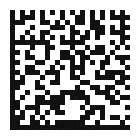

[Decoded(data=b'Some new example. Second example.', rect=Rect(left=10, top=10, width=120, height=120))]

In [467]:
iso_transf_img = Image.fromarray(albumentations.ISONoise(p=1, intensity=(0.1, 0.9))(image=np.array(img))["image"])
display(iso_transf_img)

pylibdmtx.pylibdmtx.decode(np.array(iso_transf_img))

# Augmentations

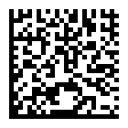

In [4]:
encoded = pylibdmtx.pylibdmtx.encode('Some new example. Second example.'.encode('utf8'))
img = Image.frombytes('RGB', (encoded.width, encoded.height), encoded.pixels)
img = img.resize((128, 128))
img

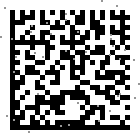

In [3]:
# CoarseDropout of the rectangular regions in the image.
Image.fromarray(albumentations.CoarseDropout(always_apply=True, fill_value=150, max_height=2, max_width=2, max_holes=40)(image=np.array(img))["image"])

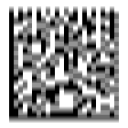

In [10]:
# Apply motion blur to the input image using a random-sized kernel.
Image.fromarray(albumentations.MotionBlur(always_apply=True, blur_limit=(7, 11))(image=np.array(img))["image"])

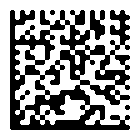

In [5]:
# Blur the input image using a median filter with a random aperture linear size.
Image.fromarray(albumentations.MedianBlur(always_apply=True, blur_limit=3)(image=np.array(img))["image"])

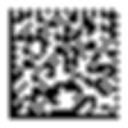

In [17]:
# Apply defocus transform.
Image.fromarray(albumentations.Defocus(always_apply=True, radius=(3,7))(image=np.array(img))["image"])

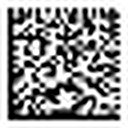

In [25]:
# Decreases image quality by downscaling and upscaling back.
Image.fromarray(albumentations.Downscale(always_apply=True, interpolation=cv2.INTER_LANCZOS4)(image=np.array(img))["image"])

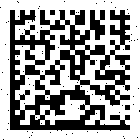

In [8]:
# Set pixels to 0 with some probability.
Image.fromarray(albumentations.PixelDropout(always_apply=True)(image=np.array(img))["image"])

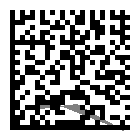

In [9]:
# Simulates shadows for the image
Image.fromarray(albumentations.RandomShadow(always_apply=True)(image=np.array(img))["image"])

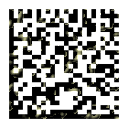

In [33]:
#
Image.fromarray(albumentations.Spatter(always_apply=True, intensity=0.8)(image=np.array(img))["image"])

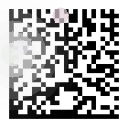

In [43]:
# Simulates Sun Flare for the image
Image.fromarray(albumentations.RandomSunFlare(always_apply=True, src_radius=100, num_flare_circles_lower=3, src_color=((240, 240, 240)))(image=np.array(img))["image"])

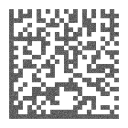

In [54]:
# ISO noise
Image.fromarray(albumentations.ISONoise(always_apply=True, intensity=(0.5, 0.9))(image=np.array(img))["image"])

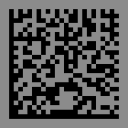

In [308]:
Image.fromarray(albumentations.RandomBrightnessContrast(always_apply=True, brightness_limit=0, contrast_limit=0.5)(image=np.array(img))["image"])

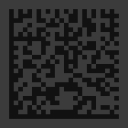

In [241]:
# ranodmly change brightness, contrast and saturation
Image.fromarray(albumentations.ColorJitter(always_apply=True,
    brightness=(0.2, 1.2), contrast=(0.4, 1), saturation=(0.2, 1.2))(image=np.array(img))["image"])

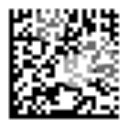

In [187]:
# random fog
Image.fromarray(albumentations.RandomFog(always_apply=True, fog_coef_lower=0.6, alpha_coef=0.5)(image=np.array(img))["image"])

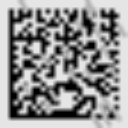

In [236]:
# adds rain effect
Image.fromarray(albumentations.RandomRain(always_apply=True,
    drop_length=20, drop_width=3, brightness_coefficient=0.9, blur_value=5, rain_type="drizzle")(image=np.array(img))["image"])

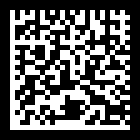

In [16]:
# invert image
inverted_img = Image.fromarray(albumentations.InvertImg(always_apply=True)(image=np.array(img))["image"])
inverted_img

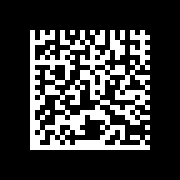

In [17]:
padded_img = np.pad(np.array(inverted_img.convert("L")), 20, mode='constant', constant_values=np.array(inverted_img.convert("L"))[0][0])
Image.fromarray(padded_img)

In [18]:
pylibdmtx.pylibdmtx.decode(inverted_img)

[Decoded(data=b'Some new example. Second example.', rect=Rect(left=9, top=10, width=120, height=119))]

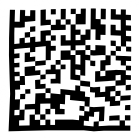

In [19]:
# affine transformations
Image.fromarray(albumentations.PiecewiseAffine(always_apply=True, scale=(0.01, 0.03))(image=np.array(img))["image"])

In [20]:
import random
def change_code_color(img):
        if not albumentations.is_rgb_image(img):
            raise TypeError("ChangeBackgroundColor transformation expects 3-channel images.")
        
        synth_img = np.array(img)
        red, green, blue = synth_img.T
        white_areas = (red == 255) & (blue == 255) & (green == 255)
        black_areas = (red == 0) & (blue == 0) & (green == 0)
        if random.random() <= 0.6:
            random_color = random.sample(range(220, 255), 3) # light color
            synth_img[white_areas.T] = random_color
        else: 
            random_color = random.sample(range(0, 60), 3) # dark color
            synth_img[black_areas.T] = random_color
        return synth_img

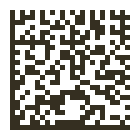

In [21]:
Image.fromarray(change_code_color(np.array(img)))

In [109]:
preserving = albumentations.Compose([
        albumentations.Resize(128, 128, interpolation=cv2.INTER_NEAREST),
        albumentations.InvertImg(p=0.1),
        albumentations.RandomRotate90(),
        albumentations.Rotate(limit=[-3, 3], border_mode=cv2.BORDER_CONSTANT, value = [255, 255, 255])
], p=1)

destructive = albumentations.Compose([
    albumentations.ISONoise(intensity=(0.2, 0.8), p=1),
    albumentations.PiecewiseAffine(scale=(0.001, 0.04), p=0.8),

    albumentations.SomeOf([
        albumentations.RandomFog(fog_coef_lower=0.5, alpha_coef=0.5, p=0.7),
        albumentations.ColorJitter(brightness=(0.5, 1), contrast=(0.5, 1), saturation=0.5, p=0.9),
        albumentations.Spatter(intensity=0.2, p=0.7),
        albumentations.RandomSunFlare(src_radius=80, num_flare_circles_lower=3, src_color=((240, 240, 240)), p=0.5),
    ], n=2, p=1),
    
    albumentations.OneOf([
        albumentations.MotionBlur(blur_limit=(7, 13), p=1, allow_shifted=False),
        albumentations.MedianBlur(blur_limit=3, p=0.3),
        albumentations.Defocus(radius=(3, 5), p=1),
        albumentations.Downscale(interpolation=cv2.INTER_LANCZOS4, p=0.7),
    ], p=1),
])

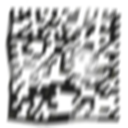

[]

In [135]:
augmented_img = Image.fromarray(preserving(image=np.array(img))["image"])
augmented_img = Image.fromarray(destructive(image=np.array(augmented_img))["image"])
display(augmented_img)

pylibdmtx.pylibdmtx.decode(np.array(augmented_img))

# Network

In [50]:
def visualize_images(text, target_img, corrupted_img):
    f, ax = plt.subplots(1, 2)
    ax[0].imshow(target_img, cmap='gray', vmin=0, vmax=255)
    ax[1].imshow(corrupted_img, cmap='gray', vmin=0, vmax=255)
    ax[0].title.set_text("Target DM code")
    ax[0].title.set_fontsize(20)
    ax[1].title.set_text("Corrupted DM code")
    ax[1].title.set_fontsize(20)
    for a in ax:
        a.axis('off')
    f.suptitle(f"DM code: {text}", fontsize=20)
    plt.tight_layout()
    plt.show()

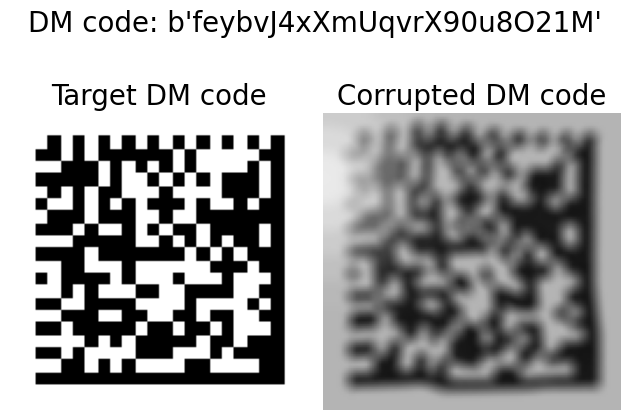

In [ ]:
import dm_codes.datamatrix_provider

dm_codes_provider = dm_codes.datamatrix_provider.DataMatrixProvider()
target_image, corrupted_image, encoded_text = dm_codes_provider.generate_dm_pylibdmtx()
visualize_images(encoded_text, target_image, corrupted_image)

In [53]:
import string

string.ascii_letters + string.digits

'abcdefghijklmnopqrstuvwxyzABCDEFGHIJKLMNOPQRSTUVWXYZ0123456789'

In [487]:
foo = np.array([255, 255, 255])
foo2 = np.array([250, 240, 253])
np.isclose(foo, foo2, atol=5)

array([ True, False,  True])

In [488]:
log_n_predictions=3
bleb = 10

In [489]:
[bleb*i//log_n_predictions for i in range(log_n_predictions)]

[0, 3, 6]

In [490]:
foo_dict = {
    "col_1" : 3,
    "col_2" : 6,
    "col_3": -1
}
foo_dict_list = [foo_dict, foo_dict, foo_dict]

In [491]:
pd.DataFrame(foo_dict_list)

col_1  col_2  col_3
0      3      6     -1
1      3      6     -1
2      3      6     -1

In [492]:
foo_dict_df = pd.DataFrame(foo_dict_list).mean()
foo_dict_df

col_1    3.0
col_2    6.0
col_3   -1.0
dtype: float64

In [493]:
foo_dict_df.to_frame(name="value").reset_index(names="metric")

metric  value
0  col_1    3.0
1  col_2    6.0
2  col_3   -1.0

In [494]:
foo_dicts = pd.DataFrame(foo_dict_list).mean().to_dict()

In [495]:
import segmentation_models_pytorch as smp
import torch

model = smp.Unet(
    encoder_name="mobilenet_v2",
    encoder_weights=None,
    encoder_depth=3,
    activation="identity",
    decoder_channels=[10, 10, 10],
    in_channels=1
)

model(torch.rand(10, 1, 80, 80))
model

Unet(
  (encoder): MobileNetV2Encoder(
    (features): Sequential(
      (0): Conv2dNormActivation(
        (0): Conv2d(1, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
        (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (2): ReLU6(inplace=True)
      )
      (1): InvertedResidual(
        (conv): Sequential(
          (0): Conv2dNormActivation(
            (0): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=32, bias=False)
            (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
            (2): ReLU6(inplace=True)
          )
          (1): Conv2d(32, 16, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (2): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        )
      )
      (2): InvertedResidual(
        (conv): Sequential(
          (0): Conv2dNormActivation(
            (0): Conv2d(16, 96, kernel_size=(1

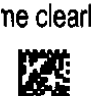

In [ ]:
import PIL.Image, PIL.ImageOps
import pylibdmtx.pylibdmtx
evil_code = PIL.Image.open("../pictures/evil_dm_code.png")
evil_code = PIL.ImageOps.expand(evil_code, border=1, fill="white")
try:
    pylibdmtx.pylibdmtx.decode(evil_code)
except Exception as e:
    print(e)
evil_code

In [2]:
import torch
loss = torch.nn.functional.mse_loss(torch.zeros(2, 3), torch.ones(2, 3))
type(loss.item())

float

In [20]:
tensor_foo = torch.tensor([[[1, 2, 3, 4, 5, 6, 7, 8], 
                   [10, 11, 12, 13, 14, 15, 16, 17]], 
                    
                  [[71, 72, 73, 74, 75, 76, 77, 78], 
                   [81, 82, 83, 84, 85, 86, 87, 88]]]) 

In [21]:
tensor_foo.shape

torch.Size([2, 2, 8])

In [32]:
len_dataloader_valid = 500
valid_batch_size = 64
log_n_predictions = 12
list_idxs = [len_dataloader_valid*i//log_n_predictions for i in range(log_n_predictions)]
batch_idxs = [i // valid_batch_size for i in list_idxs]
image_idxs = [i % valid_batch_size for i in list_idxs]
batch_image_idxs = [(i // valid_batch_size, i % valid_batch_size) for i in list_idxs]
print(list_idxs)
print(batch_idxs)
print(image_idxs)
print(batch_image_idxs)

[0, 41, 83, 125, 166, 208, 250, 291, 333, 375, 416, 458]
[0, 0, 1, 1, 2, 3, 3, 4, 5, 5, 6, 7]
[0, 41, 19, 61, 38, 16, 58, 35, 13, 55, 32, 10]
[(0, 0), (0, 41), (1, 19), (1, 61), (2, 38), (3, 16), (3, 58), (4, 35), (5, 13), (5, 55), (6, 32), (7, 10)]


In [31]:
batch_idx = 1
for batch_i, image_i in batch_image_idxs:
    if batch_i == batch_idx:
        print(batch_i, image_i)

1 19
1 61


In [7]:
import random
print(random.random())
print(random.sample(range(190, 250), 3))
print([random.randrange(170, 255)]*3)

0.4800636682524304
[226, 218, 211]
[238, 238, 238]


# Real data

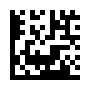

In [498]:
encoded = pylibdmtx.pylibdmtx.encode("11505771-01".encode('utf8'))
img_0631 = Image.frombytes('RGB', (encoded.width, encoded.height), encoded.pixels)
img_0631

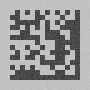

In [499]:
# rotate
img_0631_deformed = img_0631.rotate(90)
# change background white to gray
img_0631_deformed = np.array(img_0631_deformed)
red, green, blue = img_0631_deformed.T
white_areas_0631 = (red == 255) & (blue == 255) & (green == 255)
img_0631_deformed[white_areas_0631.T] = (169, 169, 169)
# add ISO noise
img_0631_deformed = Image.fromarray(albumentations.ISONoise(always_apply=True, intensity=(0.5, 1))(image=np.array(img_0631_deformed))["image"])

img_0631_deformed


In [500]:
pylibdmtx.pylibdmtx.decode(img_0631)

[Decoded(data=b'11505771-01', rect=Rect(left=9, top=10, width=70, height=69))]

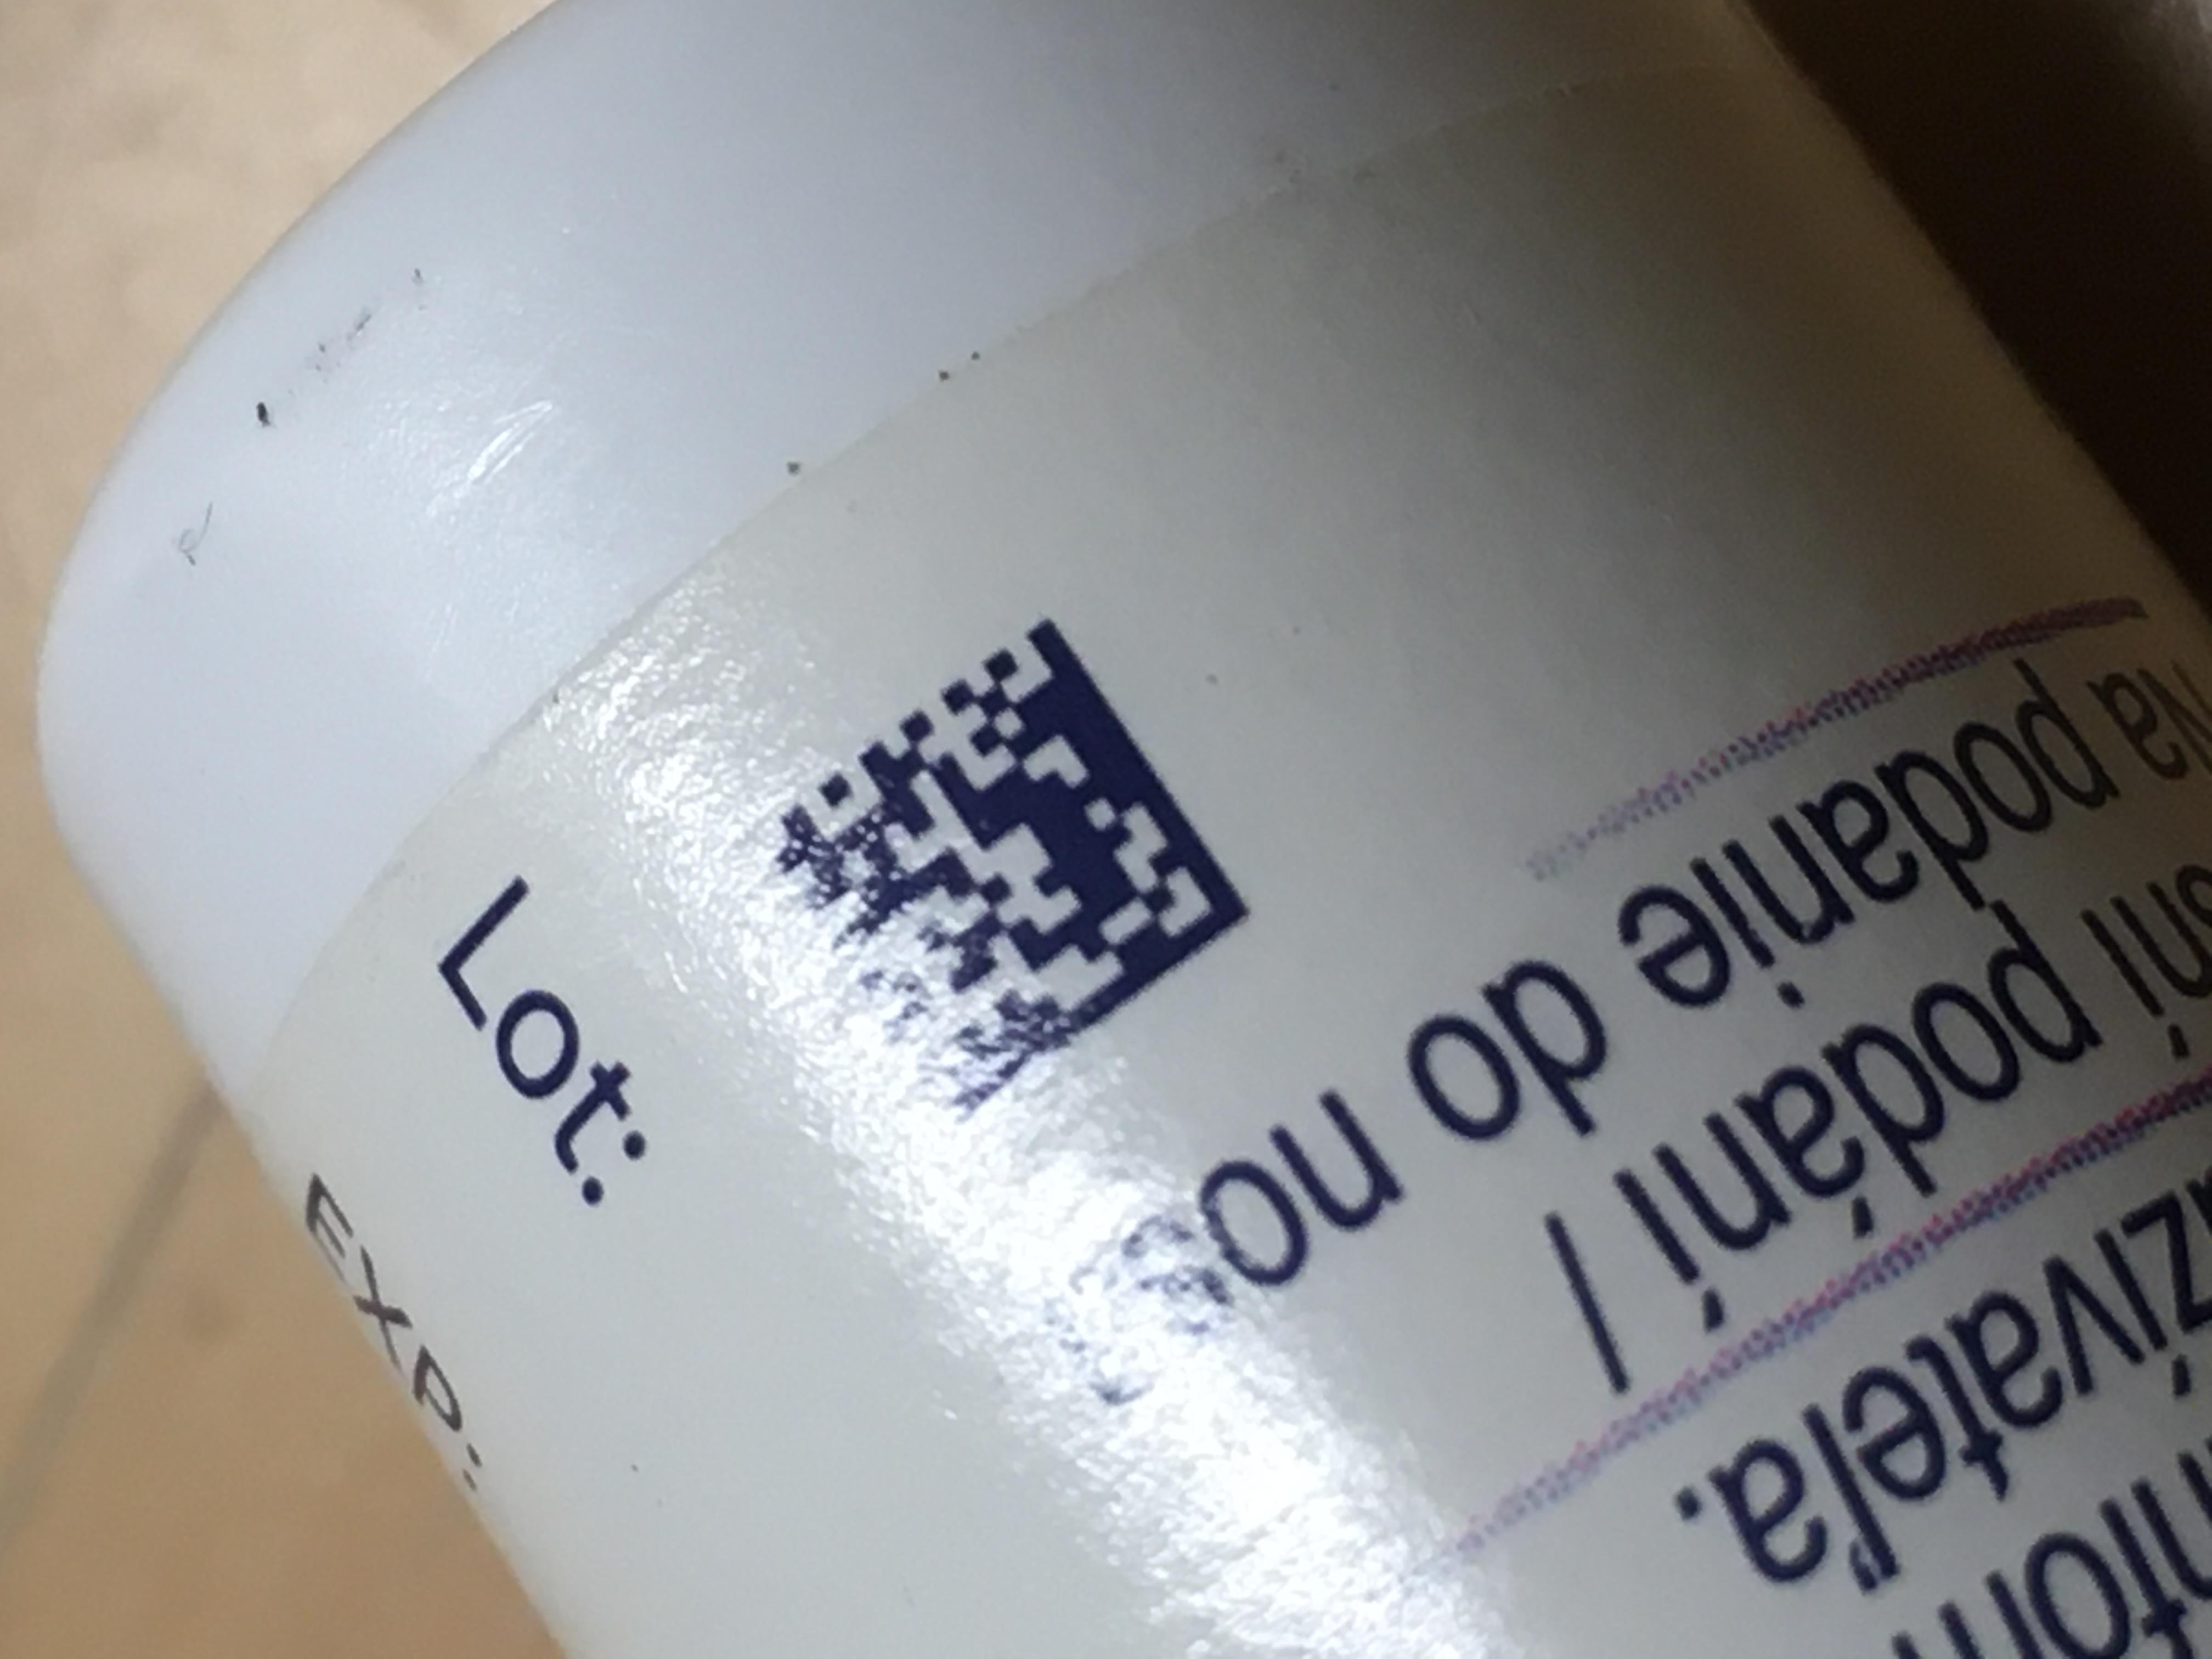

In [6]:
file_name = "002"
dm_code = Image.open(f"../photos/formated_photo_json/{file_name}.jpg")
dm_code

In [8]:
# load annotations in json format

with open(f"../photos/formated_photo_json/{file_name}.json") as json_file:
    json_data = json.load(json_file)
    print(json_data)

{'tl': [1380, 1536], 'tr': [1923, 1110], 'br': [2295, 1668], 'bl': [1737, 2064], 'clean': False}


In [18]:
vertices = np.asarray((json_data["tl"], json_data["tr"], json_data["br"], json_data["bl"]))
is_clean = json_data["clean"]
vertices, is_clean

(array([[1380, 1536],
        [1923, 1110],
        [2295, 1668],
        [1737, 2064]]),
 False)

In [19]:
square_side = 200
square_padding = 20
unit_square = np.asarray([
    [square_padding, square_padding],
    [square_side + square_padding, square_padding],
    [square_side + square_padding, square_side + square_padding],
    [square_padding, square_side + square_padding]])
unit_square

array([[ 20,  20],
       [220,  20],
       [220, 220],
       [ 20, 220]])

In [20]:
transf = transform.ProjectiveTransform()
if not transf.estimate(unit_square, vertices): raise Exception("estimate failed")
warped_np_image = transform.warp(np.array(dm_code), transf, output_shape=(square_side + square_padding * 2, square_side + square_padding * 2))
type(warped_np_image)

numpy.ndarray

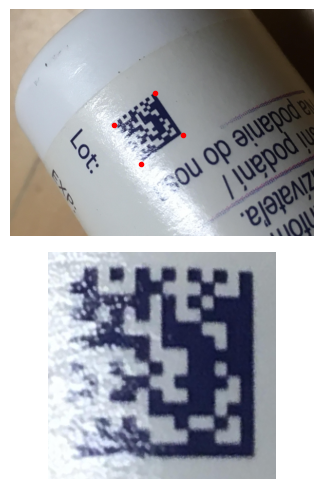

In [21]:
fig, ax = plt.subplots(nrows=2, figsize=(10, 5))

ax[0].imshow(dm_code, cmap=plt.cm.gray)
ax[0].plot(vertices[:, 0], vertices[:, 1], '.r')
ax[1].imshow(warped_np_image)

for a in ax:
    a.axis('off')

plt.tight_layout()
plt.show()

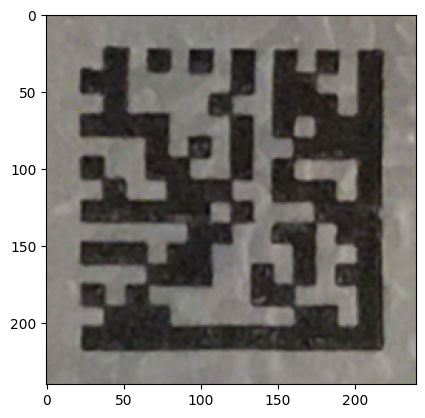

In [506]:
plt.imshow(warped_np_image)

In [507]:
print(type(warped_np_image))
print(warped_np_image.dtype)
print(warped_np_image.shape)

<class 'numpy.ndarray'>
float64
(240, 240, 3)


In [508]:
print(pylibdmtx.pylibdmtx.decode(warped_np_image))
print(pylibdmtx.pylibdmtx.decode(warped_np_image * 255))

[]
[Decoded(data=b'E51085011W', rect=Rect(left=218, top=21, width=-196, height=195))]


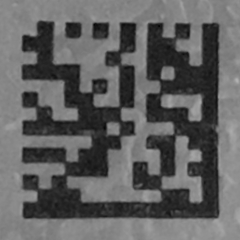

In [509]:
warped_im_image = Image.fromarray((warped_np_image * 255).astype(np.uint8))
warped_im_image = warped_im_image.convert("L")
warped_im_image

In [510]:
pylibdmtx.pylibdmtx.decode(warped_im_image)

[Decoded(data=b'E51085011W', rect=Rect(left=218, top=21, width=-196, height=195))]

In [511]:
# save the warped image to a folder
warped_im_image.save(f"../photos/cropped/{file_name}.JPG")

In [512]:
# save the original image without its metadata

original_image = Image.open(f"../photos/{file_name}.JPG")
    
data_image = list(original_image.getdata())
image_without_exif = Image.new(original_image.mode, original_image.size)
image_without_exif.putdata(data_image)

image_without_exif.save(f"../photos/without_metadata/{file_name}.JPG")

# Synthetic dataset

<class 'numpy.ndarray'>
[Decoded(data=b'Some synthetic example that seems realistic.', rect=Rect(left=9, top=10, width=130, height=129))]


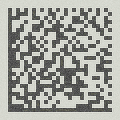

[Decoded(data=b'Some synthetic example that seems realistic.', rect=Rect(left=8, top=8, width=103, height=104))]

In [19]:
from random import sample
from cv2 import INTER_LANCZOS4

# create synthetic dm code
encoded = pylibdmtx.pylibdmtx.encode('Some synthetic example that seems realistic.'.encode('utf8'))
synth_img = Image.frombytes('RGB', (encoded.width, encoded.height), encoded.pixels)

# change background white pixels to random light color
synth_img = np.array(synth_img)
red, green, blue = synth_img.T
white_areas = (red == 255) & (blue == 255) & (green == 255)
random_colors = sample(range(180, 240), 3)
synth_img[white_areas.T] = random_colors
print(type(synth_img))
print(pylibdmtx.pylibdmtx.decode(np.array(synth_img)))

# define transformations
synth_transform = albumentations.Compose([
    albumentations.Resize(120, 120, interpolation=INTER_LANCZOS4),
    albumentations.RandomRotate90(),
    albumentations.ISONoise(intensity=(0.5, 1)),
    albumentations.OneOf([
        albumentations.MotionBlur(blur_limit=(9, 13), p=1, allow_shifted=False),
        albumentations.Defocus(radius=(3, 5), p=1),
        albumentations.Downscale(interpolation=INTER_LANCZOS4, p=1),
    ], p=0), # just for debuging
    albumentations.Spatter(intensity=0.5),
    albumentations.RandomSunFlare(src_radius=80, p=0.3)
])

# apply transformations
transf_synth_img = Image.fromarray(synth_transform(image=np.array(synth_img))["image"])
display(transf_synth_img)

# decode
pylibdmtx.pylibdmtx.decode(np.array(transf_synth_img))

In [114]:
print(type(transf_synth_img))
type(cv2.cvtColor(np.array(transf_synth_img), cv2.COLOR_RGB2GRAY))

<class 'PIL.Image.Image'>


numpy.ndarray

(150, 150)
(190, 190)


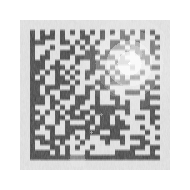

In [90]:
print(np.array(transf_synth_img.convert("L")).shape)
padded = np.pad(np.array(transf_synth_img.convert("L")), 20, mode='constant', constant_values=255)
print(padded.shape)
Image.fromarray(padded)

In [123]:
pylibdmtx.pylibdmtx.decode(padded)

[Decoded(data=b'Some synthetic example that seems realistic.', rect=Rect(left=30, top=30, width=130, height=129))]

# Analyse real datataset

In [28]:
# load dataset from hugging face
hf_whole_dataset = datasets.load_dataset("shortery/dm-codes")

pd_valid_dataset = pd.DataFrame(hf_whole_dataset["validation"])
pd_test_dataset = pd.DataFrame(hf_whole_dataset["test"])
pd_valid_dataset.head()

image            tl  \
0  <PIL.JpegImagePlugin.JpegImageFile image mode=...  [1632, 1908]   
1  <PIL.JpegImagePlugin.JpegImageFile image mode=...  [1869, 1737]   
2  <PIL.JpegImagePlugin.JpegImageFile image mode=...  [1737, 2064]   
3  <PIL.JpegImagePlugin.JpegImageFile image mode=...  [1412, 2096]   
4  <PIL.JpegImagePlugin.JpegImageFile image mode=...  [1648, 1692]   

             tr            br            bl  is_clean  split         text  \
0   [1632, 884]   [2646, 873]  [2652, 1896]      True  valid  11505771-01   
1   [2430, 993]  [3183, 1542]  [2604, 2262]     False  valid  11505771-01   
2  [1380, 1536]  [1923, 1110]  [2295, 1668]     False  valid  11505771-01   
3   [1476, 932]   [2628, 984]  [2580, 2144]     False  valid  11505771-01   
4   [1640, 600]   [2732, 600]  [2724, 1692]     False  valid  11505771-01   

  image_name  
0    000.jpg  
1    001.jpg  
2    002.jpg  
3    003.jpg  
4    004.jpg

In [29]:
# number of unique DM codes
len(pd_valid_dataset[(pd_valid_dataset["is_clean"])]) + len(pd_test_dataset[(pd_test_dataset["is_clean"])])

56

In [30]:
len(pd_test_dataset[(pd_test_dataset["is_clean"])])

37

In [31]:
# number of unique texts
len(pd_valid_dataset["text"].unique()) + len(pd_test_dataset["text"].unique())

55

In [32]:
len(pd_test_dataset["text"].unique())

36

In [33]:
pd_test_dataset["text"].unique()

array(['E51085011W', '010859473902303117250331103010422211073XFC4HP6',
       '375212A', '375599A',
       '010805644634026421MG9M922PNX172501311021703',
       '1726103110129080706110060034', '010400172403772993227001794004',
       '336829B', '91753681', '90012107',
       '0104052199286884112301181728010110300103494', '90297516',
       'LB7210B', '25BR16AG02', '25MR16AG00', '90335928', '20143890',
       'W25MX32CEE0', 'GH44-02712A+R37J1DNDL82HM3', '56500',
       '01040464459466771123101910001588600001124011469461170000',
       '68658103', '1S0C52861PC2BTCH', '90368364', '10211372',
       'E51085631W', '90442932', '90392296', '737990', 'L00725', 'L00724',
       '90362554', '3612623347980', '67772289',
       '010599700131811921816968741598201725103110F2A01A',
       '92123605213202401080000053846434'], dtype=object)

In [34]:
tmp_valid = pd.DataFrame(pd_valid_dataset.groupby("text")["image_name"].count()).reset_index()
tmp_valid

text  image_name
0                                0105000593-1133630           6
1   01085940598615972199955409452172501311025300020           5
2                                          10192673           4
3                                          10212632           5
4                                       11505771-01           5
5                      1726103110129080705180050024           6
6                                   20046335-000-01           4
7                                   20046536-000-01           6
8                                        25NX16CEE0           3
9                                            294098           6
10                                    3612623285091           6
11                                         68870105           5
12                                         69754934           6
13                                           738020           4
14                                         90401099           5
15                                         90414252           8
16                                         90443003           6
17                                         BES99201           6
18                                       E81084720W           5

In [35]:
tmp_valid["image_name"].mean()

5.315789473684211